<a href="https://colab.research.google.com/github/NikhitapHegde/final_year_project/blob/main/final_brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
from tqdm import tqdm

manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [2]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [3]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'archive (4).zip'  # Change this if your file has a different name

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

print("Files extracted to: extracted_files/")


Files extracted to: extracted_files/


In [4]:

dataroot ='extracted_files/brain_tumor_dataset'

workers = 2
batch_size = 64
image_size = 64
nc = 3
nz = 100
ngf = 64
ndf = 64
num_epochs = 5000
lr = 0.0002
beta1 = 0.5
ngpu = 1

dataloader:  <enumerate object at 0x7cbfeabf7c00>


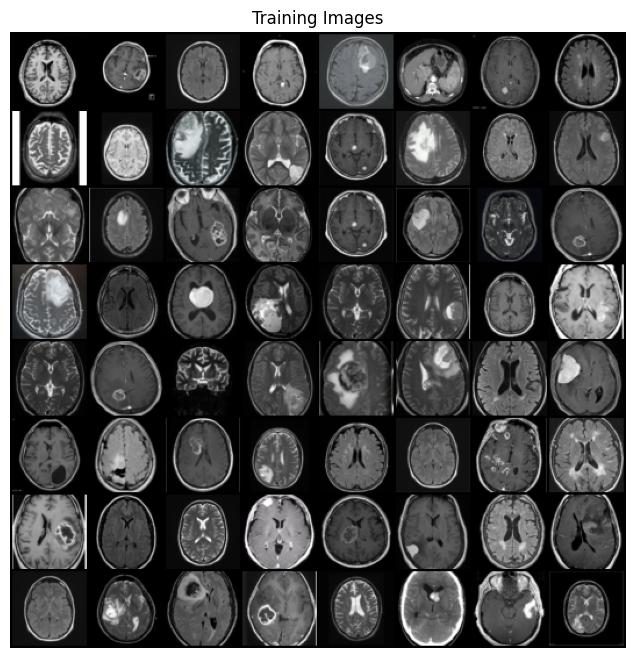

In [5]:

dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)
print("dataloader: ", enumerate(dataloader))

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [27]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn

# Assuming the previous dataset is a folder with images
original_dataset_path = 'extracted_files/brain_tumor_dataset'

# Define image transformation (resize and normalize)
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Adjust the normalization according to your dataset
])

# Load the original (real) dataset
real_dataset = datasets.ImageFolder(original_dataset_path, transform=transform)

# Split dataset into train and test
train_size = int(0.8 * len(real_dataset))
test_size = len(real_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(real_dataset, [train_size, test_size])

# Create DataLoader for train and test
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define your model (using pre-trained ResNet-18)
netD = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
netD.fc = nn.Linear(netD.fc.in_features, 2)  # Output 2 classes: Real (0) or Fake (1)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netD.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    netD.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = netD(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        if i % 50 == 0:  # Print every 50 iterations
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Calculate training accuracy
    train_accuracy = 100 * correct_preds / total_preds
    print(f"Training Accuracy: {train_accuracy:.2f}%")

print("Training Complete!")


Epoch [1/10], Step [0/4], Loss: 0.9931
Training Accuracy: 59.41%
Epoch [2/10], Step [0/4], Loss: 0.1157
Training Accuracy: 98.02%
Epoch [3/10], Step [0/4], Loss: 0.0441
Training Accuracy: 100.00%
Epoch [4/10], Step [0/4], Loss: 0.0091
Training Accuracy: 99.01%
Epoch [5/10], Step [0/4], Loss: 0.0556
Training Accuracy: 96.53%
Epoch [6/10], Step [0/4], Loss: 0.0439
Training Accuracy: 98.51%
Epoch [7/10], Step [0/4], Loss: 0.0482
Training Accuracy: 99.01%
Epoch [8/10], Step [0/4], Loss: 0.0088
Training Accuracy: 100.00%
Epoch [9/10], Step [0/4], Loss: 0.0078
Training Accuracy: 100.00%
Epoch [10/10], Step [0/4], Loss: 0.0075
Training Accuracy: 99.01%
Training Complete!


In [29]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models
import torch.optim as optim

# Assuming test_loader is already created as per the training code

# Define your model (using pre-trained ResNet-18)
netD = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
netD.fc = nn.Linear(netD.fc.in_features, 2)  # Output 2 classes: Real (0) or Fake (1)

# Load the trained model (assuming you have saved the model after training)
# netD.load_state_dict(torch.load('model.pth'))  # Uncomment if using a saved model

# Testing the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netD.to(device)

netD.eval()  # Set the model to evaluation mode
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = netD(inputs)
        _, predicted = torch.max(outputs.data, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

# Calculate test accuracy
test_accuracy = 100 * correct_preds / total_preds
print(f"Test Accuracy: {test_accuracy}%")


Test Accuracy: 86.90%


In [6]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [7]:

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(

            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()

        )

    def forward(self, input):
        return self.main(input)


In [8]:

netG = Generator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
netG.apply(weights_init)

print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [9]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(

            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [10]:

netD = Discriminator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
netD.apply(weights_init)

print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [11]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [20]:
import torch
import torchvision.utils as vutils
import os

# Initialize variables
img_list = []
G_losses = []
D_losses = []
iters = 0
images_to_generate = 3000  # Set to generate 3000 images
generated_images_count = 0

# Ensure fixed_noise is defined (fixed noise for generating samples for visual inspection)
fixed_noise = torch.randn(64, nz, 1, 1, device=device)  # Adjust batch size and noise dimension as needed

print("Starting Training Loop...")

# Start training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()

        # Get real images and labels
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Generate fake images
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Train the Generator
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        iters += 1

        # Log the losses every 50 steps
        if iters % 50 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}]\t'
                  f'Loss_D: {errD.item():.4f}\tLoss_G: {errG.item():.4f}\t'
                  f'D(x): {D_x:.4f}\tD(G(z)): {D_G_z1:.4f} / {D_G_z2:.4f}')

        # Append the losses to the lists
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Generate images and save them after every batch until 3000 images are generated
        if generated_images_count < images_to_generate:
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()  # Generate fake images
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

            output_path = 'extracted_files/DCGAN_results/'
            if not os.path.exists(output_path):
                os.makedirs(output_path)

            # Save generated images
            for j in range(b_size):  # Adjust for your batch size (64 in this case)
                if generated_images_count < images_to_generate:
                    vutils.save_image(fake[j], '%s/fake_samples_%d.png' % (output_path, generated_images_count), normalize=True)
                    generated_images_count += 1
                else:
                    break  # Stop if 3000 images are generated

        if generated_images_count >= images_to_generate:
            print(f"Generated {generated_images_count} images. Stopping the generation.")
            break  # Stop the inner loop after 3000 images

    if generated_images_count >= images_to_generate:
        break  # Stop the outer loop after generating 3000 images

print(f"Training completed. {generated_images_count} images have been generated.")


Starting Training Loop...
Generated 3000 images. Stopping the generation.
Training completed. 3000 images have been generated.


In [25]:
import torch
import torch.utils.data as data
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import os
import numpy as np
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from PIL import Image
import torchvision.utils as vutils

# Assuming the necessary imports and initializations are already done
# and your model (netD) is set up correctly.

# Step 1: Load previous and generated datasets

# Example: Assuming the previous dataset is a folder with images
original_dataset_path = 'extracted_files/brain_tumor_dataset'
generated_dataset_path = 'extracted_files/DCGAN_results/'

# Assuming images are stored in a specific format (e.g., PNG)
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Adjust the normalization according to your dataset
])

# Load real images (original dataset)
real_dataset = datasets.ImageFolder(original_dataset_path, transform=transform)

# Assuming the generated images are saved as fake_samples_0.png, fake_samples_1.png, etc.
generated_images_count = 10  # Set this to the actual number of generated images
generated_images = []
for i in range(generated_images_count):
    img_path = f'{generated_dataset_path}/fake_samples_{i}.png'  # Path to generated image
    img = Image.open(img_path)  # Open the image using PIL
    img = transform(img)  # Apply the same transformation as for the real images
    generated_images.append(img)

generated_images = torch.stack(generated_images)

# Combine both datasets
combined_images = real_dataset.imgs + [(os.path.join(generated_dataset_path, f'fake_samples_{i}.png'), 0) for i in range(generated_images_count)]
combined_labels = [label for path, label in real_dataset.imgs] + [1 for _ in range(generated_images_count)]  # Assuming '0' is real, '1' is fake

# Step 2: Split the combined dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

# Custom Dataset class to handle loading both real and generated images
class CombinedDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path, label = self.image_paths[idx]
        img = Image.open(img_path)  # Read image

        # Convert grayscale images to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, label

# Create training and testing datasets
train_dataset = CombinedDataset(X_train, y_train, transform=transform)
test_dataset = CombinedDataset(X_test, y_test, transform=transform)

# Step 3: Create DataLoader for train and test
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print("Training Loader created.")

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
print("Testing Loader created.")

# Step 4: Define your model (for example, using a simple CNN)
# Using pre-trained ResNet-18 model
netD = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)  # Use pre-trained weights
netD.fc = torch.nn.Linear(netD.fc.in_features, 2)  # Output 2 classes: Real (0) or Fake (1)

# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Step 5: Training the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netD.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    netD.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = netD(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        if i % 50 == 0:  # Print every 50 iterations
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Calculate training accuracy
    train_accuracy = 100 * correct_preds / total_preds
    print(f"Training Accuracy: {train_accuracy:.2f}%")

print("Training Complete!")


Training Loader created.
Testing Loader created.
Epoch [1/10], Step [0/4], Loss: 0.9037
Training Accuracy: 70.00%
Epoch [2/10], Step [0/4], Loss: 0.1469
Training Accuracy: 98.10%
Epoch [3/10], Step [0/4], Loss: 0.0269
Training Accuracy: 99.52%
Epoch [4/10], Step [0/4], Loss: 0.0091
Training Accuracy: 99.52%
Epoch [5/10], Step [0/4], Loss: 0.0101
Training Accuracy: 99.52%
Epoch [6/10], Step [0/4], Loss: 0.0072
Training Accuracy: 100.00%
Epoch [7/10], Step [0/4], Loss: 0.0119
Training Accuracy: 100.00%
Epoch [8/10], Step [0/4], Loss: 0.0146
Training Accuracy: 99.52%
Epoch [9/10], Step [0/4], Loss: 0.0165
Training Accuracy: 99.52%
Epoch [10/10], Step [0/4], Loss: 0.0050
Training Accuracy: 100.00%
Training Complete!


In [26]:
import torch
import torch.utils.data as data
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import os
import numpy as np
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from PIL import Image
import torchvision.utils as vutils

# Assuming the necessary imports and initializations are already done
# and your model (netD) is set up correctly and loaded.

# Step 2: Load previous and generated datasets (assuming it's the same)

# Example: Assuming the previous dataset is a folder with images
original_dataset_path = 'extracted_files/brain_tumor_dataset'
generated_dataset_path = 'extracted_files/DCGAN_results/'

transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Adjust the normalization according to your dataset
])

# Load real images (original dataset)
real_dataset = datasets.ImageFolder(original_dataset_path, transform=transform)

# Assuming the generated images are saved as fake_samples_0.png, fake_samples_1.png, etc.
generated_images_count = 10  # Set this to the actual number of generated images
generated_images = []
for i in range(generated_images_count):
    img_path = f'{generated_dataset_path}/fake_samples_{i}.png'  # Path to generated image
    img = Image.open(img_path)  # Open the image using PIL
    img = transform(img)  # Apply the same transformation as for the real images
    generated_images.append(img)

generated_images = torch.stack(generated_images)

# Combine both datasets
combined_images = real_dataset.imgs + [(os.path.join(generated_dataset_path, f'fake_samples_{i}.png'), 0) for i in range(generated_images_count)]
combined_labels = [label for path, label in real_dataset.imgs] + [1 for _ in range(generated_images_count)]

# Step 6: Create DataLoader for testing
test_dataset = CombinedDataset(combined_images, combined_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 6: Testing the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netD.to(device)

netD.eval()  # Set the model to evaluation mode
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = netD(inputs)
        _, predicted = torch.max(outputs.data, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

# Calculate test accuracy
test_accuracy = 100 * correct_preds / total_preds
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 96.20%
